In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
import cv2
import math

from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from IPython.core import display as ICD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys, os
script_dir = sys.path[0]
print(script_dir)

C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project


In [3]:
#Constant zone
IMG_PATH_TRAIN = os.path.join(script_dir+r'\train')
IMG_PATH_TEST = os.path.join(script_dir+r'\test1')
IMG_PATH_TRAIN_MOD = os.path.join(script_dir+r'\train_modified')
IMG_PATH_TEST_MOD = os.path.join(script_dir+r'\test_modified')
print("Train path:",IMG_PATH_TRAIN+"\n")
print("Test path:",IMG_PATH_TEST+"\n")
print("Modified train path:",IMG_PATH_TRAIN_MOD+"\n")
print("Modified test path:",IMG_PATH_TEST_MOD)

MODIFIED_WIDTH = 100
MODIFIED_HEIGHT = 100

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['figure.facecolor'] = 'black'

plt.rc('axes', titlesize=25) #fontsize of the title
plt.rc('axes', labelsize=19) #fontsize of the x and y labels
plt.rc('xtick', labelsize=19) #fontsize of the x tick labels
plt.rc('ytick', labelsize=19) #fontsize of the y tick labels

Train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train

Test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test1

Modified train path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\train_modified

Modified test path: C:\Users\eliko\Desktop\Data_science_project\Project\data visualization project\cats vs dogs project\test_modified


In [4]:
#Function zone

def modify_img(image, new_width, new_height): #Modifies an image according to chosen parameters
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    modified_img = cv2.resize(gray_img, (new_width, new_height))
    return modified_img

def read_img(picture_path, filename): #Reads file from path
    return cv2.imread(picture_path+"/"+filename, -1)

def write_img(destination_path, filename, image): #Writes new file to given path
    cv2.imwrite(destination_path+"/"+filename, image)
     
def modify_train(): #Modifies the train data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN):
        img = read_img(picture_path = IMG_PATH_TRAIN, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TRAIN_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of training data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Train data modification complete")
    
def modify_test(): #Modifies the test data and writes it to the appropriate directory
    count = 0
    for f in os.listdir(IMG_PATH_TEST):
        img = read_img(picture_path = IMG_PATH_TEST, filename = f)
        mod_img = modify_img(img, new_width = MODIFIED_WIDTH, new_height = MODIFIED_HEIGHT)
        write_img(destination_path = IMG_PATH_TEST_MOD, filename = f, image = mod_img)
        msg = "Modified {0}% of testing data".format(int(count/250))
        print(msg)
        clear_output(wait=True)
        count += 1

    print("Test data modification complete")
      
@jit(nogil = True)
def images_to_df_train(): #Returns dataframe of the train files
    train_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    label_names = []
    count = 0
    for f in os.listdir(IMG_PATH_TRAIN_MOD):
        img = read_img(picture_path = IMG_PATH_TRAIN_MOD, filename = f)
        train_array = np.insert(train_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        label_names.append(f.split('.')[0])
        msg = "Loaded {0} images. {1}%".format(count, count/250)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    
    train_df = pd.DataFrame(data = train_array.reshape(25000, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    label_df = pd.DataFrame(data = label_names, columns = ['label'])
    label_df.insert(loc=0, column='Label', value=LabelEncoder().fit_transform(label_df['label']))
    label_df = label_df.drop(columns = ['label'])
    train_final = pd.concat([train_df, label_df], axis = 1)
    print("Train dataframe loading complete")
    return train_final

@jit(nogil = True)
def images_to_df_test(): #Returns dataframe of the test files
    test_array = np.ndarray(shape = (0,MODIFIED_WIDTH,MODIFIED_HEIGHT), dtype= 'uint8')
    count = 0
    for f in os.listdir(IMG_PATH_TEST_MOD):
        img = read_img(picture_path = IMG_PATH_TEST_MOD, filename = f)
        test_array = np.insert(test_array, count , img.reshape((1,MODIFIED_WIDTH,MODIFIED_HEIGHT)), axis = 0)
        msg = "Loaded {0} images. {1}%".format(count, count/125)
        print(msg)

        clear_output(wait=True)
        count += 1
    print("Data loading complete")
    test_df = pd.DataFrame(data = test_array.reshape(12500, MODIFIED_WIDTH*MODIFIED_HEIGHT))
    print("Test dataframe loading complete")
    return test_df

In [5]:
%%time
modify_train()

Train data modification complete
Wall time: 1min 44s


In [6]:
%%time
train_df = images_to_df_train()

Data loading complete
Train dataframe loading complete
Wall time: 12min 20s


In [7]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,168,173,178,181,185,188,190,193,196,198,...,3,3,2,2,2,2,2,2,2,0
1,44,43,43,42,52,32,53,38,41,60,...,51,49,50,55,61,62,90,18,34,0
2,38,27,42,50,46,56,59,55,54,58,...,160,148,135,132,148,159,168,171,153,0
3,220,224,223,227,229,223,225,234,229,226,...,212,205,204,202,214,222,215,212,213,0
4,118,117,123,91,82,95,132,131,149,179,...,95,96,91,102,121,96,89,92,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,142,143,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
24996,116,78,104,85,97,115,71,83,86,88,...,94,79,99,87,77,85,94,92,76,1
24997,42,35,47,56,66,48,48,57,60,38,...,133,136,126,72,112,181,128,114,167,1
24998,254,250,246,235,224,208,187,144,113,74,...,103,104,113,111,112,106,118,115,119,1


In [8]:
print("Null count in the train dataframe:",train_df.isnull().sum().sum())
print("Dataframe shape:",train_df.shape)

Null count in the train dataframe: 0
Dataframe shape: (25000, 10001)


## Models without unsupervised preprocessing

### Dummy model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1:]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = y)
print("Train shape:",X_train.shape)
print("Test shape:",y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print("Test class counts:",dict(zip(unique, counts)))

Train shape: (22500, 10000)
Test shape: (2500, 1)
Test class counts: {0: 1250, 1: 1250}


In [12]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy="uniform")
dum.fit(X_train, y_train)
print("Dummy model train score:",dum.score(X_train, y_train))
print("Dummy model test score:",dum.score(X_test, y_test))

Dummy model train score: 0.5041333333333333
Dummy model test score: 0.4932


## Apply PCA on the data

In [13]:
PCA_data = train_df.iloc[:,:-1]
PCA_data = pd.DataFrame(StandardScaler().fit_transform(PCA_data))

In [14]:
from sklearn.decomposition import PCA

In [15]:
%%time
pca_model = PCA(n_components=MODIFIED_WIDTH * MODIFIED_HEIGHT,whiten=True,svd_solver = 'randomized', random_state = 42)
pca_model.fit(PCA_data)

Wall time: 14min 17s


PCA(n_components=10000, random_state=42, svd_solver='randomized', whiten=True)

Text(0, 0.5, 'Explained variance')

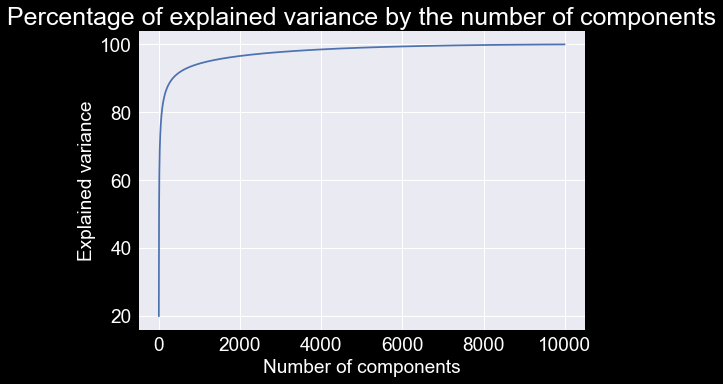

In [16]:
plt.grid(True)
plt.plot(np.cumsum(pca_model.explained_variance_ratio_ * 100))
plt.title("Percentage of explained variance by the number of components")
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [17]:
pca_model_new = PCA(n_components=0.95,whiten=True, random_state = 42)
pca_model_new.fit(PCA_data)

PCA(n_components=0.95, random_state=42, whiten=True)

In [18]:
pca_new_reduced = pca_model_new.transform(PCA_data)
print("Fit complete with n_components = {0}".format(pca_model_new.n_components_))
pca_recovered = pca_model_new.inverse_transform(pca_new_reduced)

Fit complete with n_components = 1212


In [19]:
print("New dataframe shape:",pca_new_reduced.shape)
print("New recovered dataframe shape:",pca_recovered.shape)

New dataframe shape: (25000, 1212)
New recovered dataframe shape: (25000, 10000)


In [20]:
pca_data = pd.DataFrame(pca_new_reduced)
# pca_data = pd.DataFrame(StandardScaler().fit_transform(pca_data))
pca_data = pd.concat([pca_data, y], axis = 1)
X_new = pca_data.iloc[:,:-1]
y_new = pca_data.iloc[:,-1:]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.10, random_state=42, stratify = y)
print("Train shape:",X_train_new.shape)
print("Test shape:",X_test_new.shape)
unique, counts = np.unique(y_test_new, return_counts=True)
print("Test class counts:",dict(zip(unique, counts)))

Train shape: (22500, 1212)
Test shape: (2500, 1212)
Test class counts: {0: 1250, 1: 1250}


## Applying models on data after PCA dimensionality reduction

### Logistic regression

In [55]:
%%time
logistic_model = LogisticRegression(solver = 'saga', 
                                    n_jobs = os.cpu_count() - 1,  
                                    class_weight = 'balanced', 
                                    multi_class = 'ovr',  
                                    random_state=42)
logistic_model.fit(X_train_new, y_train_new.values.ravel())

Wall time: 4.72 s


LogisticRegression(class_weight='balanced', multi_class='ovr', n_jobs=11,
                   random_state=42, solver='saga')

In [56]:
print("Classes known to the model:",logistic_model.classes_)
scores = cross_validate(logistic_model, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("Logistic regression baseline train score:",logistic_model.score(X_train_new, y_train_new))
print("Logistic regression cross-validation train score:",scores['train_score'].mean())
print("Logistic regression baseline test score:",logistic_model.score(X_test_new, y_test_new))
print("Logistic regression cross-validation test score:",scores['test_score'].mean())

Classes known to the model: [0 1]
Logistic regression baseline train score: 0.6177777777777778
Logistic regression cross-validation train score: 0.6357111111111111
Logistic regression baseline test score: 0.5476
Logistic regression cross-validation test score: 0.5337333333333334


### Naive bayes 

In [57]:
%%time
naive_bayes_model = GaussianNB(var_smoothing = math.pow(10,-9)).fit(X_train_new, y_train_new.values.ravel())

Wall time: 473 ms


In [58]:
print("Class count:",naive_bayes_model.class_count_)
print("Classes known to the model:",naive_bayes_model.classes_)
scores = cross_validate(naive_bayes_model, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("Naive bayes baseline train score:",naive_bayes_model.score(X_train_new, y_train_new))
print("Naive bayes cross-validation train score:",scores['train_score'].mean())
print("Naive bayes baseline test score:",naive_bayes_model.score(X_test_new, y_test_new))
print("Naive bayes cross-validation test score:",scores['test_score'].mean())

Class count: [11250. 11250.]
Classes known to the model: [0 1]
Naive bayes baseline train score: 0.5729777777777778
Naive bayes cross-validation train score: 0.5734888888888889
Naive bayes baseline test score: 0.5576
Naive bayes cross-validation test score: 0.5723111111111111


### SGD classifier

In [59]:
%%time
SGD_model = SGDClassifier(alpha = 0.5,loss = 'hinge',class_weight = 'balanced', random_state=42).fit(X_train_new, y_train_new.values.ravel())

Wall time: 853 ms


In [60]:
scores = cross_validate(SGD_model, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("SGD baseline train score:",SGD_model.score(X_train_new, y_train_new))
print("SGD cross-validation train score:",scores['train_score'].mean())
print("SGD baseline test score:",SGD_model.score(X_test_new, y_test_new))
print("SGD cross-validation test score:",scores['test_score'].mean())

SGD baseline train score: 0.6119111111111111
SGD cross-validation train score: 0.6322
SGD baseline test score: 0.5488
SGD cross-validation test score: 0.5403555555555555


### Random forest

In [61]:
%%time
forest = RandomForestClassifier(criterion = 'entropy',n_estimators=500, random_state=42, n_jobs = os.cpu_count() - 1)
forest.fit(X_train_new, y_train_new.values.ravel())

Wall time: 1min 40s


RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=11,
                       random_state=42)

In [62]:
scores = cross_validate(forest, X_train_new, y_train_new.values.ravel(), cv = 3, return_train_score = True)
print("Random forest baseline train score:",forest.score(X_train_new, y_train_new))
print("Random forest cross-validation train score:",scores['train_score'].mean())
print("Random forest baseline test score:",forest.score(X_test_new, y_test_new))
print("Random forest cross-validation test score:",scores['test_score'].mean())

Random forest baseline train score: 1.0
Random forest cross-validation train score: 1.0
Random forest baseline test score: 0.5956
Random forest cross-validation test score: 0.6051555555555556


### XGBoost

In [29]:
from xgboost import XGBClassifier
from sklearn import metrics

In [30]:
%%time
XGC_model=XGBClassifier(n_estimators=500, 
                        objective='binary:logistic', 
                        booster='gbtree').fit(X_train_new, y_train_new)

Wall time: 6min 29s


In [31]:
prediction_train=XGC_model.predict(X_train_new)
prediction_test=XGC_model.predict(X_test_new)

In [32]:
print("Train scores")
print(metrics.classification_report(y_train_new, prediction_train))
print(metrics.confusion_matrix(y_train_new, prediction_train))
print("Test scores")
print(metrics.classification_report(y_test_new, prediction_test))
print(metrics.confusion_matrix(y_test_new, prediction_test))

Train scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11250
           1       1.00      1.00      1.00     11250

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500

[[11250     0]
 [    0 11250]]
Test scores
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1250
           1       0.62      0.62      0.62      1250

    accuracy                           0.62      2500
   macro avg       0.62      0.62      0.62      2500
weighted avg       0.62      0.62      0.62      2500

[[776 474]
 [469 781]]


## Grid-search on models

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
def plot_grid_results(model_checked, grid_model): #Plots grid-search score results from best to worst
    grid_data = pd.DataFrame(grid_model.cv_results_)
    params = []
    for param in grid_model.best_params_:
        params.append("param_"+param)
    params.append('mean_test_score')
    
    grid_frame_mod = grid_data.loc[:,params]
    grid_frame_mod = grid_frame_mod.fillna(value = "None") ##Replace None with 'None' strings for plotability.
    grp = grid_frame_mod.groupby(by = params[:-1]).agg(lambda x: x).mean_test_score.nlargest(n = grid_data.shape[0])
    min_value = grid_data['mean_test_score'].min()
    max_value = grid_data['mean_test_score'].max()
    
    
    ICD.display(grid_data)#Display the results data-frame
    plt.figure(facecolor='black') 
    grp.plot(kind = "bar", figsize = (24, 8), color = "Blue")
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.ylabel("Score")
    plt.title("Gridsearch results sorted from highest to lowest({0})".format(model_checked))
    ax.set_ylim([(min_value - 0.001) ,max_value])
    plt.show()
    msg = "Best {0} model: {1} with an accuracy of {2}".format(model_checked, grid_model.best_params_, grid_model.best_score_)
    print(msg)

### Logistic-regression

In [35]:
LOG = LogisticRegression(class_weight = 'balanced', multi_class = 'ovr', random_state=42, n_jobs = os.cpu_count() - 1)
parameters = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
LOG_grid = GridSearchCV(LOG, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.217659,0.173190,0.025005,0.002161,newton-cg,{'solver': 'newton-cg'},0.528,0.5352,0.537867,0.533689,0.004167,2,0.633600,0.637200,0.636400,0.635733,0.001543
1,2.511658,0.015515,0.026006,0.000410,lbfgs,{'solver': 'lbfgs'},0.528,0.5352,0.537867,0.533689,0.004167,2,0.633667,0.637133,0.636400,0.635733,0.001492
2,1.208378,0.007216,0.022838,0.000236,liblinear,{'solver': 'liblinear'},0.528,0.5352,0.537867,0.533689,0.004167,2,0.633600,0.637133,0.636333,0.635689,0.001513
3,4.655590,0.146150,0.025003,0.000408,sag,{'solver': 'sag'},0.528,0.5352,0.537733,0.533644,0.004123,5,0.633600,0.637200,0.636467,0.635756,0.001553
4,5.673983,0.846431,0.024837,0.001545,saga,{'solver': 'saga'},0.528,0.5352,0.538000,0.533733,0.004212,1,0.633667,0.637133,0.636333,0.635711,0.001482


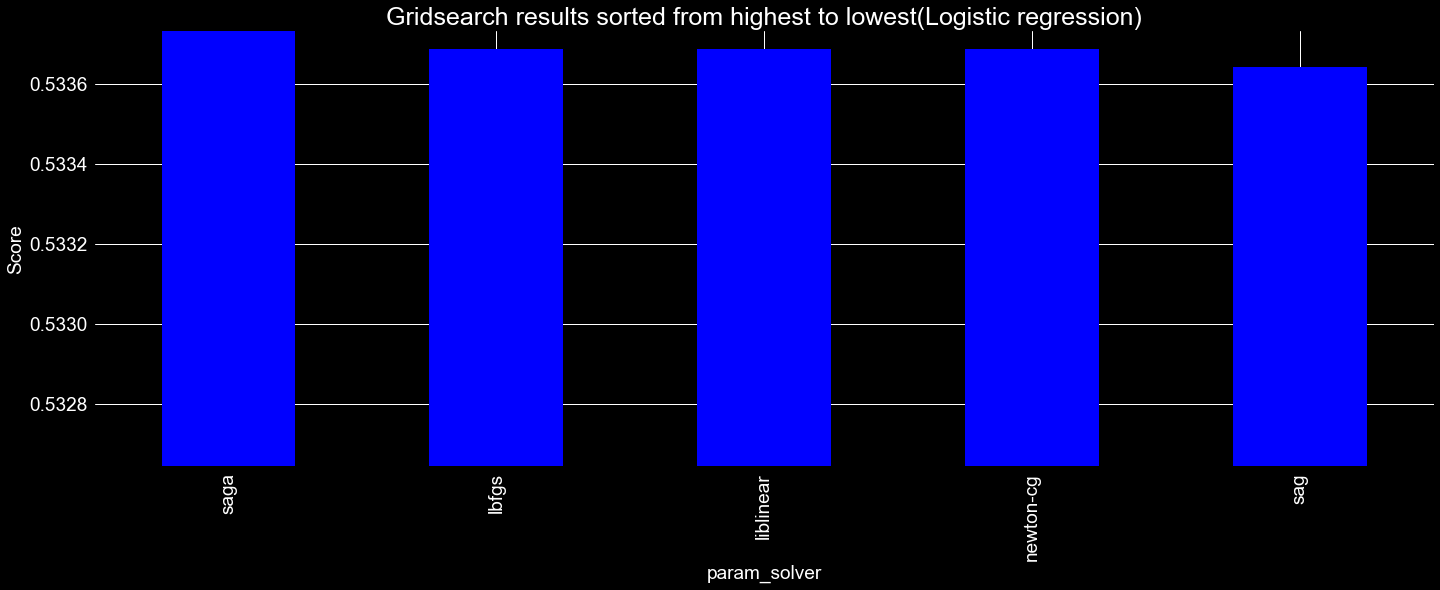

Best Logistic regression model: {'solver': 'saga'} with an accuracy of 0.5337333333333334


In [36]:
plot_grid_results("Logistic regression", LOG_grid)

### Naive bayes

In [37]:
BAYES = GaussianNB()
parameters = {"var_smoothing": [math.pow(10,-9),math.pow(10,-5),math.pow(10,-3),math.pow(10,-1)]}
BAYES_grid = GridSearchCV(BAYES, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.377400,0.002249,0.127022,0.000408,1e-09,{'var_smoothing': 1e-09},0.581067,0.568933,0.566933,0.572311,0.006245,1,0.571067,0.574000,0.5754,0.573489,0.001806
1,0.377566,0.006098,0.133690,0.003794,1e-05,{'var_smoothing': 1e-05},0.581067,0.568933,0.566933,0.572311,0.006245,1,0.571067,0.574000,0.5754,0.573489,0.001806
2,0.392069,0.008338,0.132690,0.004498,0.001,{'var_smoothing': 0.001},0.580933,0.568667,0.567200,0.572267,0.006157,3,0.571067,0.574133,0.5754,0.573533,0.001819
3,0.388069,0.002484,0.131689,0.002593,0.1,{'var_smoothing': 0.1},0.574267,0.559200,0.566400,0.566622,0.006153,4,0.566600,0.572133,0.5698,0.569511,0.002268


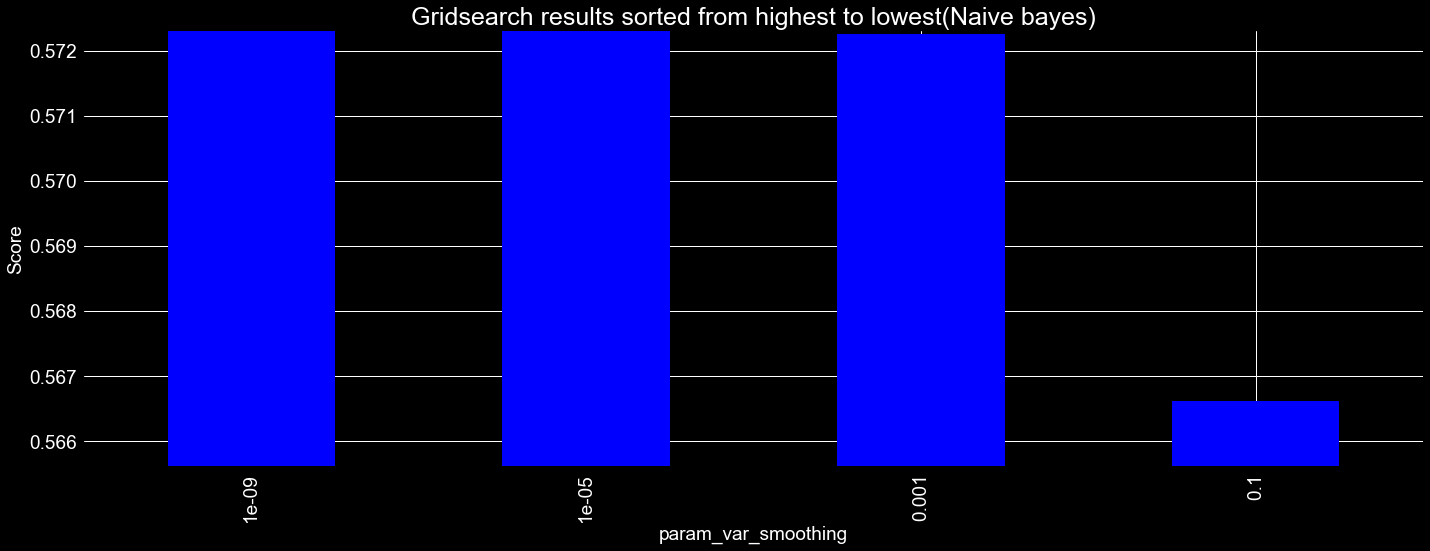

Best Naive bayes model: {'var_smoothing': 1e-09} with an accuracy of 0.5723111111111111


In [38]:
plot_grid_results("Naive bayes", BAYES_grid)

###  SGD classifier

In [39]:
SGD = SGDClassifier(class_weight = 'balanced', random_state=42)
parameters = {'alpha' : np.arange(0.5,2,0.5),'loss' : ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber']}
SGD_grid = GridSearchCV(SGD, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_loss,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.701790,0.014971,0.022671,2.354607e-04,0.5,hinge,"{'alpha': 0.5, 'loss': 'hinge'}",0.534667,0.543600,0.542800,0.540356,0.004036,1,0.632400,0.631133,0.633067,0.632200,0.000802
1,0.574101,0.004900,0.022671,6.235644e-04,0.5,log_loss,"{'alpha': 0.5, 'loss': 'log_loss'}",0.532533,0.541333,0.541333,0.538400,0.004148,2,0.631867,0.635467,0.634533,0.633956,0.001525
2,0.571600,0.004302,0.022671,2.352920e-04,0.5,log,"{'alpha': 0.5, 'loss': 'log'}",0.532533,0.541333,0.541333,0.538400,0.004148,2,0.631867,0.635467,0.634533,0.633956,0.001525
3,0.948333,0.012320,0.022837,2.359100e-04,0.5,modified_huber,"{'alpha': 0.5, 'loss': 'modified_huber'}",0.529867,0.536267,0.539467,0.535200,0.003991,6,0.633267,0.638133,0.634867,0.635422,0.002025
4,27.106740,0.403774,0.023004,4.087054e-04,0.5,squared_hinge,"{'alpha': 0.5, 'loss': 'squared_hinge'}",0.515200,0.508533,0.505467,0.509733,0.004063,16,0.533267,0.512400,0.516467,0.520711,0.009032
5,0.530593,0.012432,0.022671,2.360786e-04,0.5,perceptron,"{'alpha': 0.5, 'loss': 'perceptron'}",0.509200,0.512533,0.504667,0.508800,0.003224,17,0.561333,0.559200,0.560933,0.560489,0.000926
6,34.562044,0.485403,0.022671,2.358539e-04,0.5,squared_error,"{'alpha': 0.5, 'loss': 'squared_error'}",0.512667,0.497467,0.506000,0.505378,0.006221,18,0.509200,0.495667,0.506333,0.503733,0.005823
7,0.462414,0.001028,0.022670,2.354604e-04,0.5,huber,"{'alpha': 0.5, 'loss': 'huber'}",0.533867,0.500000,0.502400,0.512089,0.015430,15,0.630000,0.500133,0.507800,0.545978,0.059495
8,0.648947,0.012046,0.022505,4.083161e-04,1,hinge,"{'alpha': 1.0, 'loss': 'hinge'}",0.534267,0.517333,0.531467,0.527689,0.007411,9,0.625400,0.567000,0.593267,0.595222,0.023882
9,0.526759,0.013593,0.022504,1.946680e-07,1,log_loss,"{'alpha': 1.0, 'loss': 'log_loss'}",0.531733,0.532933,0.535600,0.533422,0.001616,7,0.623333,0.598000,0.617533,0.612956,0.010837


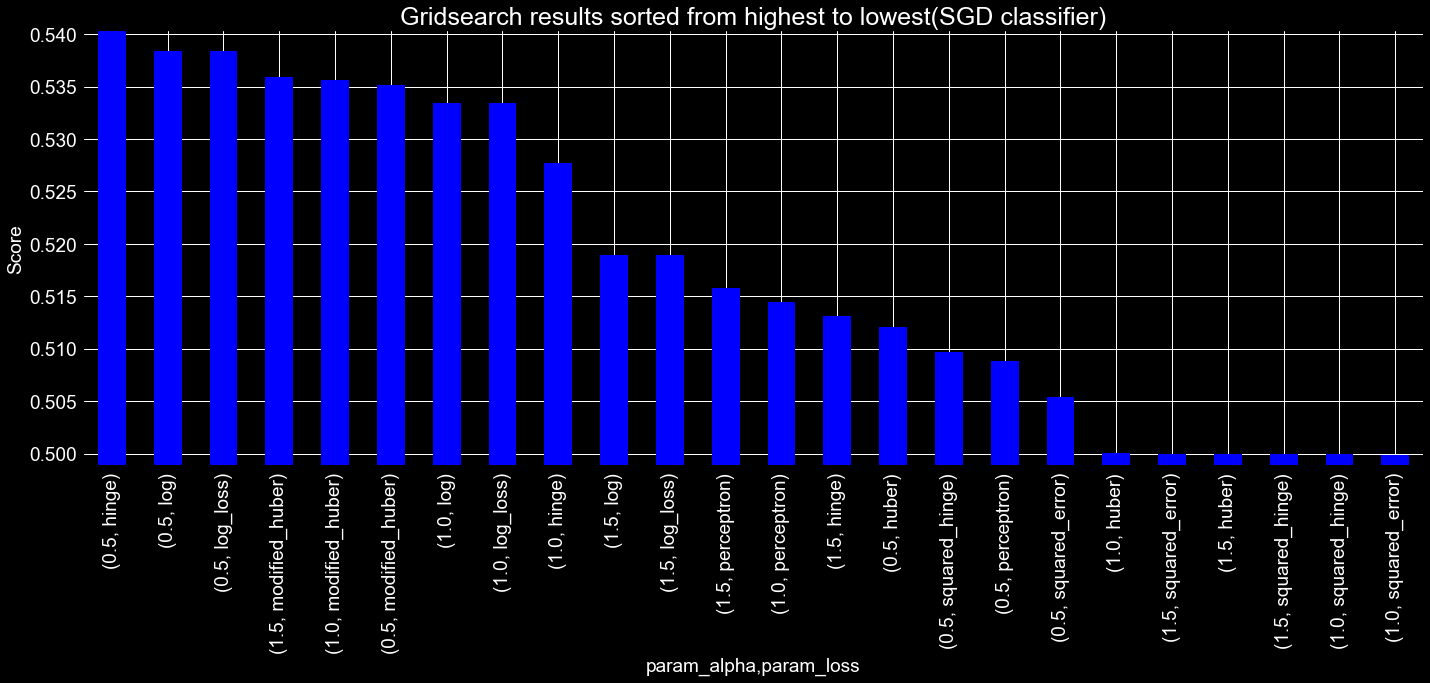

Best SGD classifier model: {'alpha': 0.5, 'loss': 'hinge'} with an accuracy of 0.5403555555555555


In [40]:
plot_grid_results("SGD classifier", SGD_grid)

### Random forest

In [41]:
FOREST = RandomForestClassifier(n_estimators = 500,random_state=42, n_jobs = os.cpu_count() - 1)
parameters = {"criterion": ["gini", "entropy"]}
FOREST_grid = GridSearchCV(FOREST, parameters, cv = 3 ,verbose = 1, return_train_score = True).fit(X_train_new, y_train_new.values.ravel())

Fitting 3 folds for each of 2 candidates, totalling 6 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.207447,0.157021,0.278515,0.010257,gini,{'criterion': 'gini'},0.609600,0.604533,0.593200,0.602444,0.006856,2,1.0,1.0,1.0,1.0,0.0
1,64.928205,0.984798,0.272880,0.004785,entropy,{'criterion': 'entropy'},0.613333,0.606267,0.595867,0.605156,0.007174,1,1.0,1.0,1.0,1.0,0.0


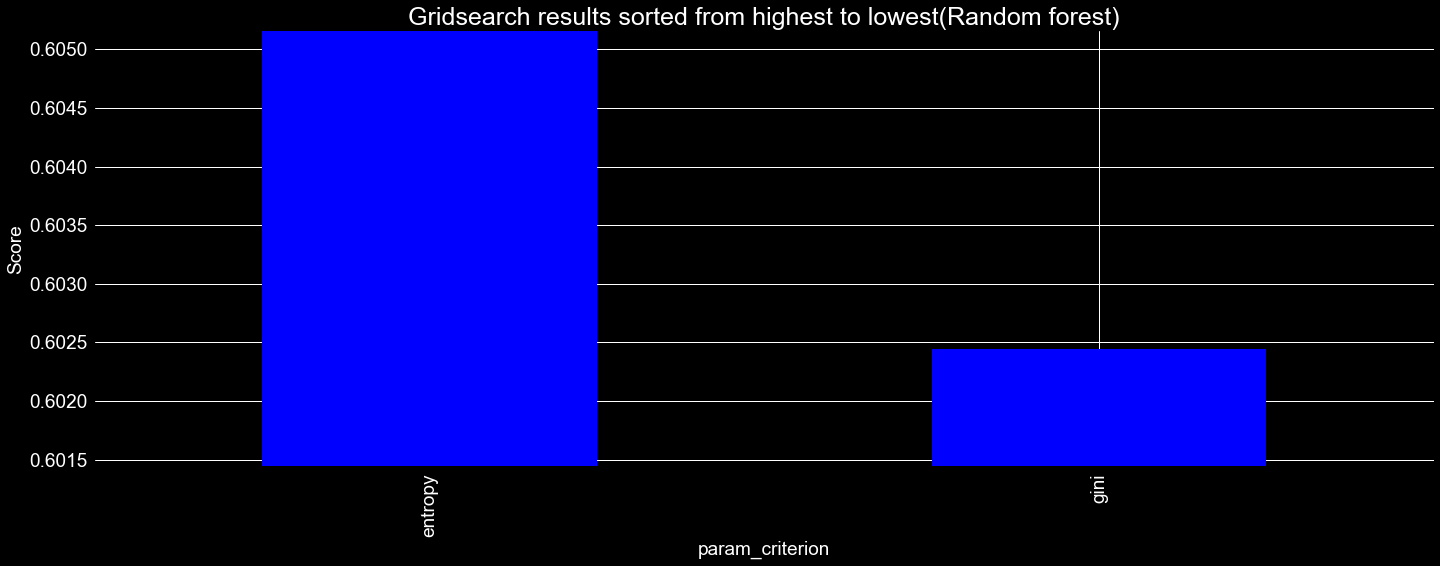

Best Random forest model: {'criterion': 'entropy'} with an accuracy of 0.6051555555555556


In [42]:
plot_grid_results("Random forest", FOREST_grid)

## MiniBatchK-Means with the models in the same pipeline

In [43]:
from sklearn.cluster import MiniBatchKMeans

### Logistic regression

In [84]:
pipeline_log = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=80,random_state=42, batch_size=3072)),
 ("log_reg", LogisticRegression(solver = 'saga', 
                                    n_jobs = os.cpu_count() - 1,  
                                    class_weight = 'balanced', 
                                    multi_class = 'ovr',  
                                    random_state=42)),
], verbose = False)
pipeline_log.fit(X_train_new, y_train_new.values.ravel())

Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=80,
                                 random_state=42)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', multi_class='ovr',
                                    n_jobs=11, random_state=42,
                                    solver='saga'))])

In [85]:
print("Pipeline score(train) when using minibatchKmeans on Logistic regression:",pipeline_log.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on Logistic regression:",pipeline_log.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on Logistic regression: 0.5685333333333333
Pipeline score(test) when using minibatchKmeans on Logistic regression: 0.5644


### Naive bayes

In [86]:
pipeline_bayes = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=10,random_state=42, batch_size=3072)),
 ("naive_bayes", GaussianNB(var_smoothing = math.pow(10,-9))),
], verbose = False)
pipeline_bayes.fit(X_train_new, y_train_new.values.ravel())

Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=10,
                                 random_state=42)),
                ('naive_bayes', GaussianNB())])

In [87]:
print("Pipeline score(train) when using minibatchKmeans on naive bayes:",pipeline_bayes.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on naive baeys:",pipeline_bayes.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on naive bayes: 0.5598666666666666
Pipeline score(test) when using minibatchKmeans on naive baeys: 0.5444


### SGD classifier

In [88]:
pipeline_SGD = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=10,random_state=42, batch_size=3072)),
 ("SGD_classifier", SGDClassifier(alpha = 0.5,loss = 'hinge',class_weight = 'balanced', random_state=42)), 
],verbose = False).fit(X_train_new, y_train_new.values.ravel())

In [89]:
print("Pipeline score(train) when using minibatchKmeans on SGD classifier:",pipeline_SGD.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on SGD classifier:",pipeline_SGD.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on SGD classifier: 0.5673333333333334
Pipeline score(test) when using minibatchKmeans on SGD classifier: 0.5648


### Random forest

In [90]:
pipeline_trees = Pipeline([
 ("minibatchKmeans", MiniBatchKMeans(n_clusters=130,random_state=42, batch_size=3072)),
 ("random_forest", RandomForestClassifier(criterion = "entropy",n_estimators = 500,random_state=42, n_jobs = os.cpu_count() - 1)),
], verbose = False)
pipeline_trees.fit(X_train_new, y_train_new.values.ravel())

Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=130,
                                 random_state=42)),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=500,
                                        n_jobs=11, random_state=42))])

In [91]:
print("Pipeline score(train) when using minibatchKmeans on random forest:",pipeline_trees.score(X_train_new, y_train_new))
print("Pipeline score(test) when using minibatchKmeans on random forest:",pipeline_trees.score(X_test_new, y_test_new))

Pipeline score(train) when using minibatchKmeans on random forest: 1.0
Pipeline score(test) when using minibatchKmeans on random forest: 0.5664


## Gridsearch for optimal K-clusters

In [82]:
%%time
param_grid = {"minibatchKmeans__n_clusters":range(10, 150, 10)}
grid_log = GridSearchCV(pipeline_log, param_grid, cv=3).fit(X_train_new, y_train_new.values.ravel())
grid_bayes = GridSearchCV(pipeline_bayes, param_grid, cv=3).fit(X_train_new, y_train_new.values.ravel())
grid_SGD = GridSearchCV(pipeline_SGD, param_grid, cv=3).fit(X_train_new, y_train_new.values.ravel())
grid_forest = GridSearchCV(pipeline_trees, param_grid, cv=3).fit(X_train_new, y_train_new.values.ravel())

Wall time: 24min 11s


In [83]:
print("Best pipeline clusters using minibatchKmeans and logistic regression:\n", grid_log.best_estimator_,"\nwith a score of:",grid_log.best_score_)
print("Best pipeline clusters using minibatchKmeans and naive bayes:\n", grid_bayes.best_estimator_,"\nwith a score of:",grid_bayes.best_score_)
print("Best pipeline clusters using minibatchKmeans and SGD:\n", grid_SGD.best_estimator_,"\nwith a score of:",grid_SGD.best_score_)
print("Best pipeline clusters using minibatchKmeans and random forest:\n", grid_forest.best_estimator_,"\nwith a score of:",grid_forest.best_score_)

Best pipeline clusters using minibatchKmeans and logistic regression:
 Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=80,
                                 random_state=42)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', multi_class='ovr',
                                    n_jobs=11, random_state=42,
                                    solver='saga'))]) 
with a score of: 0.5685777777777777
Best pipeline clusters using minibatchKmeans and naive bayes:
 Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=10,
                                 random_state=42)),
                ('naive_bayes', GaussianNB())]) 
with a score of: 0.5601333333333334
Best pipeline clusters using minibatchKmeans and SGD:
 Pipeline(steps=[('minibatchKmeans',
                 MiniBatchKMeans(batch_size=3072, n_clusters=10,
                                 random_state=42)),
    